<a href="https://colab.research.google.com/github/SangHee33/SangHee1/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [8]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,y_pred)
cm

array([[337,  20],
       [ 30, 182]])

* 정확도

In [9]:
# 정확도 = (TN+TP) / (TN+FP+FN+TP)
(cm[0,0]+cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

0.9121265377855887

* 정밀도

In [10]:
# 정밀도 = TP / (FP+TP)
cm[1,1] / (cm[0,1]+cm[1,1])

0.900990099009901

* 재현율

In [11]:
# 재현율 = TP / (FN+TP)
cm[1,1] / (cm[1,0]+cm[1,1])

0.8584905660377359

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
def get_clf_eval(y,y_pred):
  confusion = confusion_matrix(y,y_pred)
  accuracy = accuracy_score(y,y_pred)
  precision = precision_score(y,y_pred)
  recall = recall_score(y,y_pred)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

get_clf_eval(y,y_pred)

오차행렬
[[337  20]
 [ 30 182]]
정확도: 0.9121, 정밀도: 0.9010, 재현율: 0.8585


* F1 score

In [15]:
from sklearn.metrics import f1_score
f1 = f1_score(y,y_pred)
f1

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [25]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba1 = pred_proba[:,1].reshape(-1,1)
y_pred2 = Binarizer(threshold = 0.1).fit_transform(pred_proba1)

In [26]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
def get_clf_eval(y,y_pred2):
  confusion = confusion_matrix(y,y_pred2)
  accuracy = accuracy_score(y,y_pred2)
  precision = precision_score(y,y_pred2)
  recall = recall_score(y,y_pred2)
  f1 = f1_score(y,y_pred2)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1 score: {3:.4f}'.format(accuracy, precision, recall,f1))

get_clf_eval(y,y_pred2)

오차행렬
[[267  90]
 [  6 206]]
정확도: 0.8313, 정밀도: 0.6959, 재현율: 0.9717, f1 score: 0.8110


* ROC 곡선 시각화

In [27]:
from sklearn.metrics import roc_curve 

pred_proba_class1 = model_lor.predict_proba(X)[:,1]
fprs, tprs, thresholds = roc_curve(y, pred_proba_class1)
print(fprs,tprs,thresholds)

[0.         0.         0.         0.00280112 0.00280112 0.00560224
 0.00560224 0.00840336 0.00840336 0.01120448 0.01120448 0.0140056
 0.0140056  0.01680672 0.01680672 0.02240896 0.02240896 0.03081232
 0.03081232 0.03641457 0.03641457 0.03921569 0.03921569 0.04201681
 0.04201681 0.04761905 0.04761905 0.05602241 0.05602241 0.05882353
 0.05882353 0.06162465 0.06162465 0.06442577 0.06442577 0.07282913
 0.07282913 0.07843137 0.07843137 0.08683473 0.08683473 0.10364146
 0.10364146 0.10644258 0.10644258 0.11484594 0.11484594 0.11764706
 0.11764706 0.13165266 0.13165266 0.14005602 0.14005602 0.17927171
 0.17927171 0.20448179 0.20448179 0.21568627 0.21568627 0.25490196
 0.25490196 0.27170868 0.27170868 0.27731092 0.27731092 0.33613445
 0.33613445 0.36414566 0.36414566 0.62464986 0.62464986 1.        ] [0.         0.00471698 0.58490566 0.58490566 0.66981132 0.66981132
 0.71698113 0.71698113 0.73113208 0.73113208 0.74056604 0.74056604
 0.75       0.75       0.75943396 0.75943396 0.80188679 0.8018

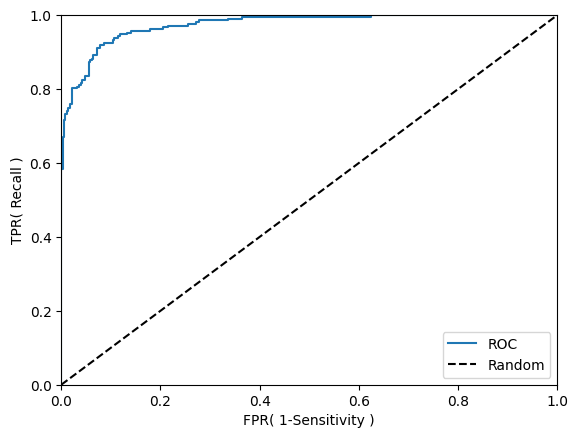

In [28]:
import matplotlib.pyplot as plt 
plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1],'k--',label='Random')
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('FPR( 1-Sensitivity )'); plt.ylabel('TPR( Recall )')
plt.legend()

* ROC AUC 값

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y,pred_proba[:,1])
print(roc_auc)

0.9741424871835527
